In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

seed = 1234
np.random.seed(seed) 

In [3]:
# This may take a couple of minutes
cifar_X, cifar_y = fetch_openml("CIFAR_10", return_X_y=True, as_frame=False)

# Convert labels from strings to integers
cifar_y = cifar_y.astype(int)

# Convert pixels from floats to integers
cifar_X = cifar_X.astype(int)

In [4]:
cifar_X_tr, cifar_X_te, cifar_y_tr, cifar_y_te = train_test_split(cifar_X, cifar_y, test_size=0.4, 
                                                                  random_state=seed, shuffle=True)

In [5]:
# Do a 50-50 split of validation and test data
cifar_X_val, cifar_y_val = cifar_X_te[12000:], cifar_y_te[12000:]

cifar_X_te, cifar_y_te   = cifar_X_te[:12000], cifar_y_te[:12000]

In [6]:
print(np.shape(cifar_X_tr), np.shape(cifar_y_tr))
print(np.shape(cifar_X_val), np.shape(cifar_y_val))
print(np.shape(cifar_X_te), np.shape(cifar_y_te))

(36000, 3072) (36000,)
(12000, 3072) (12000,)
(12000, 3072) (12000,)


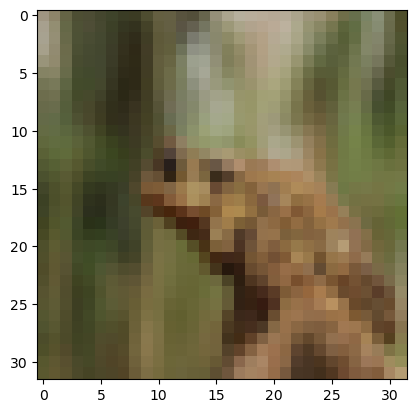

In [7]:
# Testing to see how the data can be displayed
fig, axes = plt.subplots() 

# Turn cifar_X_tr into 3x32x32 array representing RGB channels
channels = np.reshape(cifar_X_tr[1], newshape=(3,32,32))

transpose_channel = np.transpose(channels, (1,2,0))
axes.imshow(transpose_channel, interpolation='nearest')

In [8]:
# Train knn classifier for different ks
k_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20]

trainError = np.array([])
validationError = np.array([])

for k in k_vals:
    print(f"Training knn classifer on k={k}...")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(cifar_X_tr, cifar_y_tr)
    trainError = np.append(trainError, 1-knn.score(cifar_X_tr, cifar_y_tr))
    validationError = np.append(validationError, 1-knn.score(cifar_X_val, cifar_y_val))

Training knn classifer on k=1...
Training knn classifer on k=2...
Training knn classifer on k=3...
Training knn classifer on k=4...
Training knn classifer on k=5...
Training knn classifer on k=6...
Training knn classifer on k=7...
Training knn classifer on k=8...
Training knn classifer on k=9...
Training knn classifer on k=10...
Training knn classifer on k=12...
Training knn classifer on k=15...
Training knn classifer on k=20...


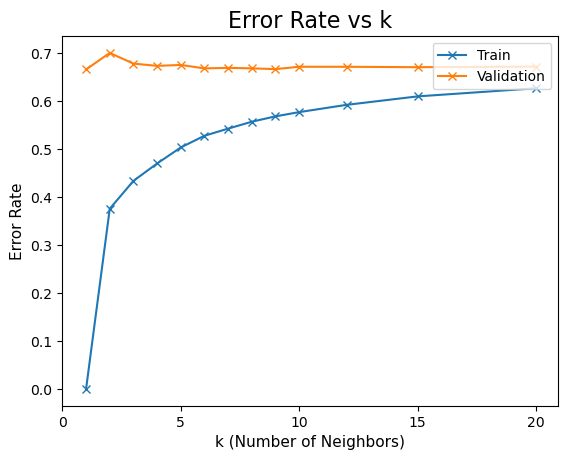

In [9]:
# Plot training and validation error rates against k

figure, axes = plt.subplots()

axes.plot(k_vals, trainError, marker='x')
axes.plot(k_vals, validationError, marker='x')

axes.set_xticks([0, 5, 10, 15, 20])

axes.set_title("Error Rate vs k", size=16)

axes.set_xlabel("k (Number of Neighbors)", size=11)
axes.set_ylabel("Error Rate", size=11)

axes.legend(["Train","Validation"], loc=1)

plt.show()

In [10]:
# Find the minimum validation Error

minTrain = trainError[1] 
minVal   = validationError[1]
minIndex = 1

for i in range(2, len(trainError)):
    if minVal > validationError[i]:
        minVal = validationError[i]
        minTrain = trainError[i]
        minIndex = k_vals[i]

print(minTrain)
print(minVal)
print(minIndex)

0.5683333333333334
0.6668333333333334
9


In [11]:
# Train on the best value of k
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(cifar_X_tr, cifar_y_tr)

KNeighborsClassifier(n_neighbors=9)

In [20]:
# calculate predictions on validation set

y_val_pred = knn.predict(cifar_X_val)
y_test_pred = knn.predict(cifar_X_te)

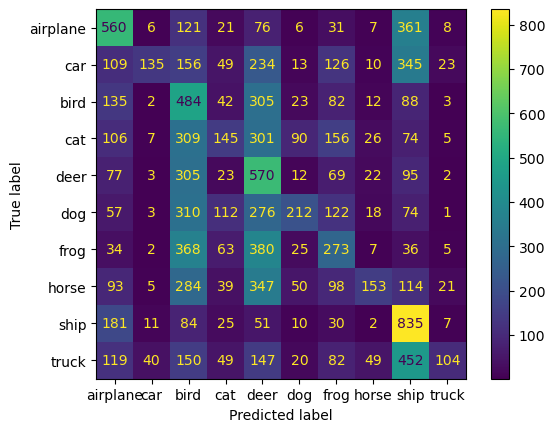

In [29]:
# confusion matrix
cm = confusion_matrix(cifar_y_val, y_val_pred)
confMatrix = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["airplane", "car",
                                    "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])
confMatrix.plot();

0.2835


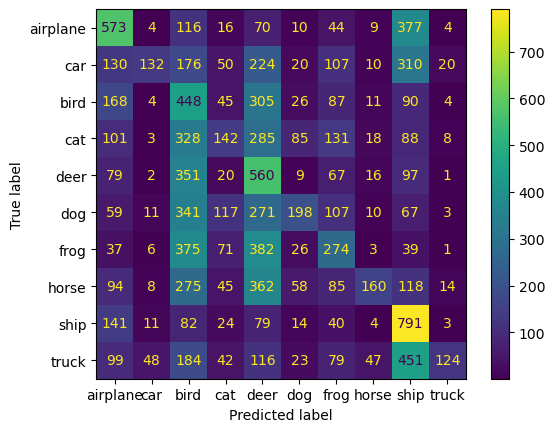

In [30]:
print(knn.score(cifar_X_te, cifar_y_te))

# confusion matrix for testing data
cm = confusion_matrix(cifar_y_te, y_test_pred)
confMatrix = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["airplane", "car",
                                    "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])
confMatrix.plot();

In [31]:
# graph training set size vs training and validation error rates

trainAndVal_X = np.concatenate((cifar_X_tr, cifar_X_val))
trainAndVal_y = np.concatenate((cifar_y_tr, cifar_y_val))


sizes = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# Equivalent to: [43200,38400,33600,28800,24000,19200,14400,9600,4800]

trainError2        = np.array([])
validationError2   = np.array([])
testError2         = np.array([])

for sz in sizes:
    print(f"Training knn classifer on size={sz}...")
    cifar_X_tr2, cifar_X_val2, cifar_y_tr2, cifar_y_val2 = train_test_split(trainAndVal_X, trainAndVal_y, test_size=sz, 
                                                                            random_state=seed, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(cifar_X_tr2, cifar_y_tr2)
    trainError2 = np.append(trainError2, 1-knn.score(cifar_X_tr2, cifar_y_tr2))
    validationError2 = np.append(validationError2, 1-knn.score(cifar_X_val2, cifar_y_val2))
    testError2 = np.append(testError2, 1-knn.score(cifar_X_te, cifar_y_te))
    

Training knn classifer on size=0.1...
Training knn classifer on size=0.2...
Training knn classifer on size=0.3...
Training knn classifer on size=0.4...
Training knn classifer on size=0.5...
Training knn classifer on size=0.6...
Training knn classifer on size=0.7...
Training knn classifer on size=0.8...
Training knn classifer on size=0.9...


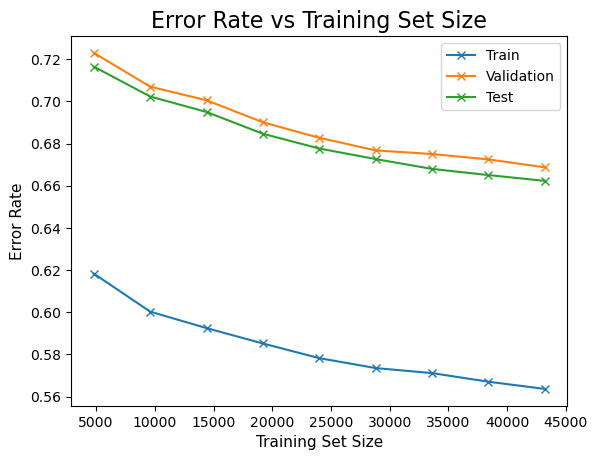

In [34]:
# Plot training and validation error rates against the size of the training set

figure, axes = plt.subplots()

trainSizes = np.array([43200,38400,33600,28800,24000,19200,14400,9600,4800])

axes.plot(trainSizes, trainError2, marker='x')
axes.plot(trainSizes, validationError2, marker='x')
axes.plot(trainSizes, testError2, marker='x')

axes.set_title("Error Rate vs Training Set Size", size=16)

axes.set_xlabel("Training Set Size", size=11)
axes.set_ylabel("Error Rate", size=11)

axes.legend(["Train","Validation", "Test"], loc=1)

plt.show()

In [16]:
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    cifar_X_tr3, cifar_X_val3, cifar_y_tr3, cifar_y_val3 = train_test_split(trainAndVal_X, trainAndVal_y, test_size=i, 
                                                                                random_state=seed, shuffle=True)
    print(np.shape(cifar_X_tr3), np.shape(cifar_X_val3))

(43200, 3072) (4800, 3072)
(38400, 3072) (9600, 3072)
(33600, 3072) (14400, 3072)
(28800, 3072) (19200, 3072)
(24000, 3072) (24000, 3072)
(19200, 3072) (28800, 3072)
(14400, 3072) (33600, 3072)
(9600, 3072) (38400, 3072)
(4800, 3072) (43200, 3072)
